In [21]:
import os
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import shapiro
import pandas as pd
import sklearn as sk
import virtualenv
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pysqlite3


In [22]:
# Read the dataframe

df = pd.read_csv("cell-count_copy.csv")
print(df.head(2))
print(df.columns)

  project subject condition  age sex treatment response sample sample_type  \
0    prj1    sbj1  melanoma   70   F       tr1        y     s1        PBMC   
1    prj1    sbj1  melanoma   70   F       tr1        y     s2        PBMC   

   time_from_treatment_start  b_cell  cd8_t_cell  cd4_t_cell  nk_cell  \
0                        0.0   36000       24000       42000     6000   
1                        7.0   30000       22000       40000     2000   

   monocyte  
0     12000  
1      6000  
Index(['project', 'subject', 'condition', 'age', 'sex', 'treatment',
       'response', 'sample', 'sample_type', 'time_from_treatment_start',
       'b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte'],
      dtype='object')


In [23]:
columns_to_sum = ['b_cell','cd8_t_cell','cd4_t_cell','nk_cell','monocyte'] 

In [24]:
df['total_cell_count'] = df[columns_to_sum].sum(axis=1)
print(df.head(2))

  project subject condition  age sex treatment response sample sample_type  \
0    prj1    sbj1  melanoma   70   F       tr1        y     s1        PBMC   
1    prj1    sbj1  melanoma   70   F       tr1        y     s2        PBMC   

   time_from_treatment_start  b_cell  cd8_t_cell  cd4_t_cell  nk_cell  \
0                        0.0   36000       24000       42000     6000   
1                        7.0   30000       22000       40000     2000   

   monocyte  total_cell_count  
0     12000            120000  
1      6000            100000  


In [26]:
df['b_cell_percentage'] = df['b_cell'] / df['total_cell_count']
df['cd8_t_cell_percentage'] = df['cd8_t_cell'] / df['total_cell_count']
df['cd4_t_cell_percentage'] = df['cd4_t_cell'] / df['total_cell_count']
df['nk_cell_percentage'] = df['nk_cell'] / df['total_cell_count']
df['monocyte_cell_percentage'] = df['monocyte'] / df['total_cell_count']

In [27]:
df.columns

Index(['project', 'subject', 'condition', 'age', 'sex', 'treatment',
       'response', 'sample', 'sample_type', 'time_from_treatment_start',
       'b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte',
       'total_cell_count', 'b_cell_percentage', 'cd8_t_cell_percentage',
       'cd4_t_cell_percentage', 'nk_cell_percentage',
       'monocyte_cell_percentage'],
      dtype='object')

In [28]:
to_print = [7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
df_selected = df.iloc[:, to_print]
print(df_selected.head(2))

  sample  b_cell  cd8_t_cell  cd4_t_cell  nk_cell  monocyte  total_cell_count  \
0     s1   36000       24000       42000     6000     12000            120000   
1     s2   30000       22000       40000     2000      6000            100000   

   b_cell_percentage  cd8_t_cell_percentage  cd4_t_cell_percentage  \
0                0.3                   0.20                   0.35   
1                0.3                   0.22                   0.40   

   nk_cell_percentage  monocyte_cell_percentage  
0                0.05                      0.10  
1                0.02                      0.06  


In [29]:
df_selected.to_csv("cell-count-percentage.csv", index=False)

In [30]:
df_melanoma = df[ (df['condition'] == 'melanoma') & (df['treatment'] == 'tr1') & (df['sample_type'] =="PBMC") ]
print(df_melanoma.head(2))
print("the numer of patients that we are working with :")
print(df_melanoma.shape)

  project subject condition  age sex treatment response sample sample_type  \
0    prj1    sbj1  melanoma   70   F       tr1        y     s1        PBMC   
1    prj1    sbj1  melanoma   70   F       tr1        y     s2        PBMC   

   time_from_treatment_start  ...  cd8_t_cell  cd4_t_cell  nk_cell  monocyte  \
0                        0.0  ...       24000       42000     6000     12000   
1                        7.0  ...       22000       40000     2000      6000   

   total_cell_count  b_cell_percentage  cd8_t_cell_percentage  \
0            120000                0.3                   0.20   
1            100000                0.3                   0.22   

   cd4_t_cell_percentage  nk_cell_percentage  monocyte_cell_percentage  
0                   0.35                0.05                      0.10  
1                   0.40                0.02                      0.06  

[2 rows x 21 columns]
the numer of patients that we are working with :
(9, 21)


In [31]:
# checking the number of samples of a specific type
# Create a frequency table using value_counts
frequency_table = df_melanoma['sample_type'].value_counts()
print("The number of PBMC table:")
print(frequency_table)

The number of PBMC table:
PBMC    9
Name: sample_type, dtype: int64


In [32]:
print(df_melanoma.head(2))
print(df_melanoma.columns)

  project subject condition  age sex treatment response sample sample_type  \
0    prj1    sbj1  melanoma   70   F       tr1        y     s1        PBMC   
1    prj1    sbj1  melanoma   70   F       tr1        y     s2        PBMC   

   time_from_treatment_start  ...  cd8_t_cell  cd4_t_cell  nk_cell  monocyte  \
0                        0.0  ...       24000       42000     6000     12000   
1                        7.0  ...       22000       40000     2000      6000   

   total_cell_count  b_cell_percentage  cd8_t_cell_percentage  \
0            120000                0.3                   0.20   
1            100000                0.3                   0.22   

   cd4_t_cell_percentage  nk_cell_percentage  monocyte_cell_percentage  
0                   0.35                0.05                      0.10  
1                   0.40                0.02                      0.06  

[2 rows x 21 columns]
Index(['project', 'subject', 'condition', 'age', 'sex', 'treatment',
       'response'

In [33]:
# Generate the BOXPLOTS

/var/folders/lx/q0dsb0_n2s3gx5jyzk2wkxwr0000gn/T/ipykernel_49463/1115249260.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melanoma[percentage_columns] = df_melanoma[percentage_columns].apply(pd.to_numeric, errors='coerce')


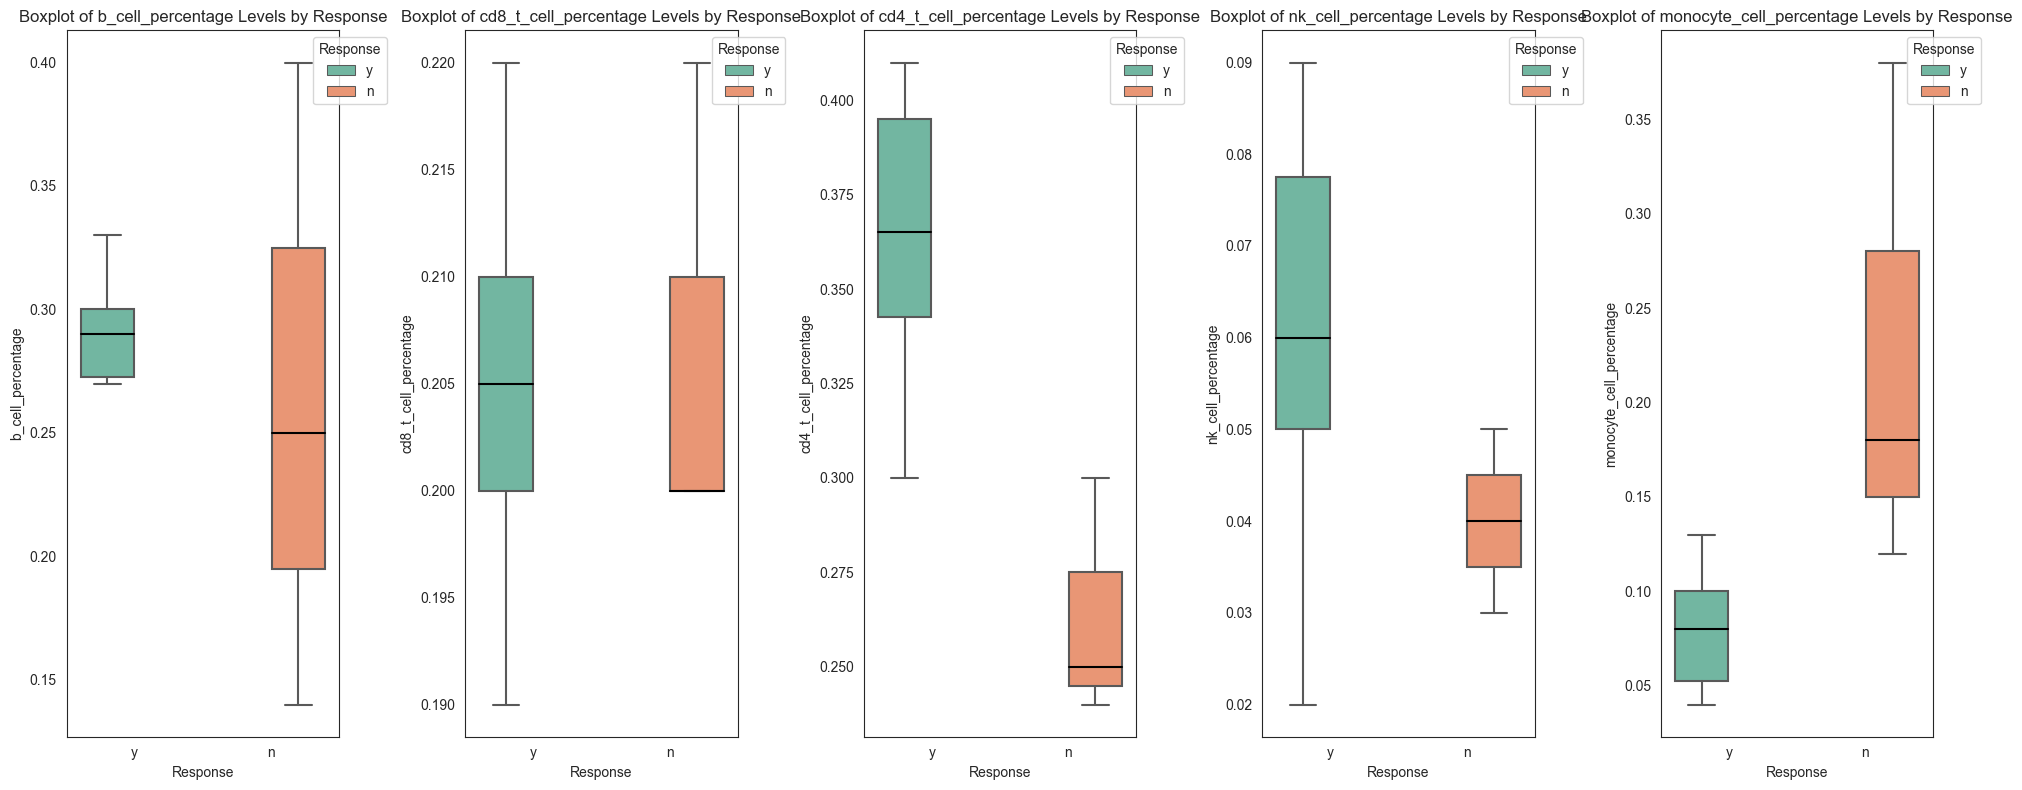

In [34]:
# to make the boxplots function of cell percentages
# Percentage columns
percentage_columns = ['b_cell_percentage', 'cd8_t_cell_percentage', 'cd4_t_cell_percentage', 'nk_cell_percentage', 'monocyte_cell_percentage']

# Set style
sns.set_style("white")

# Convert percentage columns to numeric
df_melanoma[percentage_columns] = df_melanoma[percentage_columns].apply(pd.to_numeric, errors='coerce')

# Create boxplots for percentage columns using a loop
plt.figure(figsize=(20, 8))

for column in percentage_columns:
    plt.subplot(1, len(percentage_columns), percentage_columns.index(column) + 1)
    sns.boxplot(x='response', y=column, data=df_melanoma, hue='response', palette='Set2', showfliers=False, medianprops={'color':'black'})
    plt.title(f'Boxplot of {column} Levels by Response')
    plt.xlabel('Response')
    plt.ylabel(f'{column}')
    plt.legend(title='Response', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()


In [35]:
# checking if the data is normally distributed in order to decide whether we apply T.Test or Mann-Whitney test
# We are working with the dataframe df.melanoma

In [36]:
# Percentage columns
percentage_columns = ['b_cell_percentage', 'cd8_t_cell_percentage', 'cd4_t_cell_percentage', 'nk_cell_percentage', 'monocyte_cell_percentage']

# Perform Shapiro-Wilk test for each column
normality_results = {}
for column in percentage_columns:
    stat, p_value = shapiro(df_melanoma[column])
    normality_results[column] = {'statistic': stat, 'p_value': p_value}

# Display results
for column, result in normality_results.items():
    print(f"Column: {column}")
    print(f"Shapiro-Wilk Statistic: {result['statistic']}")
    print(f"P-Value: {result['p_value']}")
    if result['p_value'] > 0.05:
        print("Conclusion: Data is normally distributed.")
    else:
        print("Conclusion: Data is not normally distributed.")
    print("\n")

Column: b_cell_percentage
Shapiro-Wilk Statistic: 0.919463038444519
P-Value: 0.3878135085105896
Conclusion: Data is normally distributed.


Column: cd8_t_cell_percentage
Shapiro-Wilk Statistic: 0.8917763829231262
P-Value: 0.20807741582393646
Conclusion: Data is normally distributed.


Column: cd4_t_cell_percentage
Shapiro-Wilk Statistic: 0.9369500875473022
P-Value: 0.5501859784126282
Conclusion: Data is normally distributed.


Column: nk_cell_percentage
Shapiro-Wilk Statistic: 0.9559968709945679
P-Value: 0.7556372284889221
Conclusion: Data is normally distributed.


Column: monocyte_cell_percentage
Shapiro-Wilk Statistic: 0.7718650698661804
P-Value: 0.009706312790513039
Conclusion: Data is not normally distributed.




In [37]:
# As can note the Cell Percentage data is Normally Distributed

# Separate data for responders (y) and non-responders (n)
df_responders = df_melanoma[df_melanoma['response'] == 'y']
df_non_responders = df_melanoma[df_melanoma['response'] == 'n']

# Perform T.TEST test for each cell population
results = {}
for column in percentage_columns:
    # stat, p_value = mannwhitneyu(df_responders[column], df_non_responders[column], alternative='two-sided')
    stat, p_value = stats.ttest_ind(df_responders[column], df_non_responders[column], alternative='two-sided')
    results[column] = {'statistic': stat, 'p_value': p_value}

# Display results
for column, result in results.items():
    print(f"Cell Population: {column}")
    print(f"T test Statistic: {result['statistic']}")
    print(f"P-Value: {result['p_value']}")
    if result['p_value'] < 0.05:
        print("Conclusion: There is a statistically significant difference.")
    else:
        print("Conclusion: There is no statistically significant difference.")
    print("\n")

Cell Population: b_cell_percentage
T test Statistic: 0.553010041337502
P-Value: 0.5974659421936256
Conclusion: There is no statistically significant difference.


Cell Population: cd8_t_cell_percentage
T test Statistic: -0.2182178902359975
P-Value: 0.8334845817349182
Conclusion: There is no statistically significant difference.


Cell Population: cd4_t_cell_percentage
T test Statistic: 3.6342189215581544
P-Value: 0.008350925121947631
Conclusion: There is a statistically significant difference.


Cell Population: nk_cell_percentage
T test Statistic: 1.2833778958394957
P-Value: 0.24021030035486787
Conclusion: There is no statistically significant difference.


Cell Population: monocyte_cell_percentage
T test Statistic: -2.638266851059826
P-Value: 0.03350772741676288
Conclusion: There is a statistically significant difference.




In [38]:
# As visually suggested by the boxplots, there is a statiscally difference between 
# Responders and Not-responders in CD4 T cells, and Monocyte Percentages